In [ ]:
import os
import zipfile

local_zip = '/content/drive/My Drive/Data for Learning/Intel_multiclass_image_dataset/111880_269359_bundle_archive.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/Data for Learning/Intel_multiclass_image_dataset')
zip_ref.close()

In [61]:
import numpy as np

/content/drive/My Drive/Data for Learning/Intel_multiclass_image_dataset/seg_train/seg_train/


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

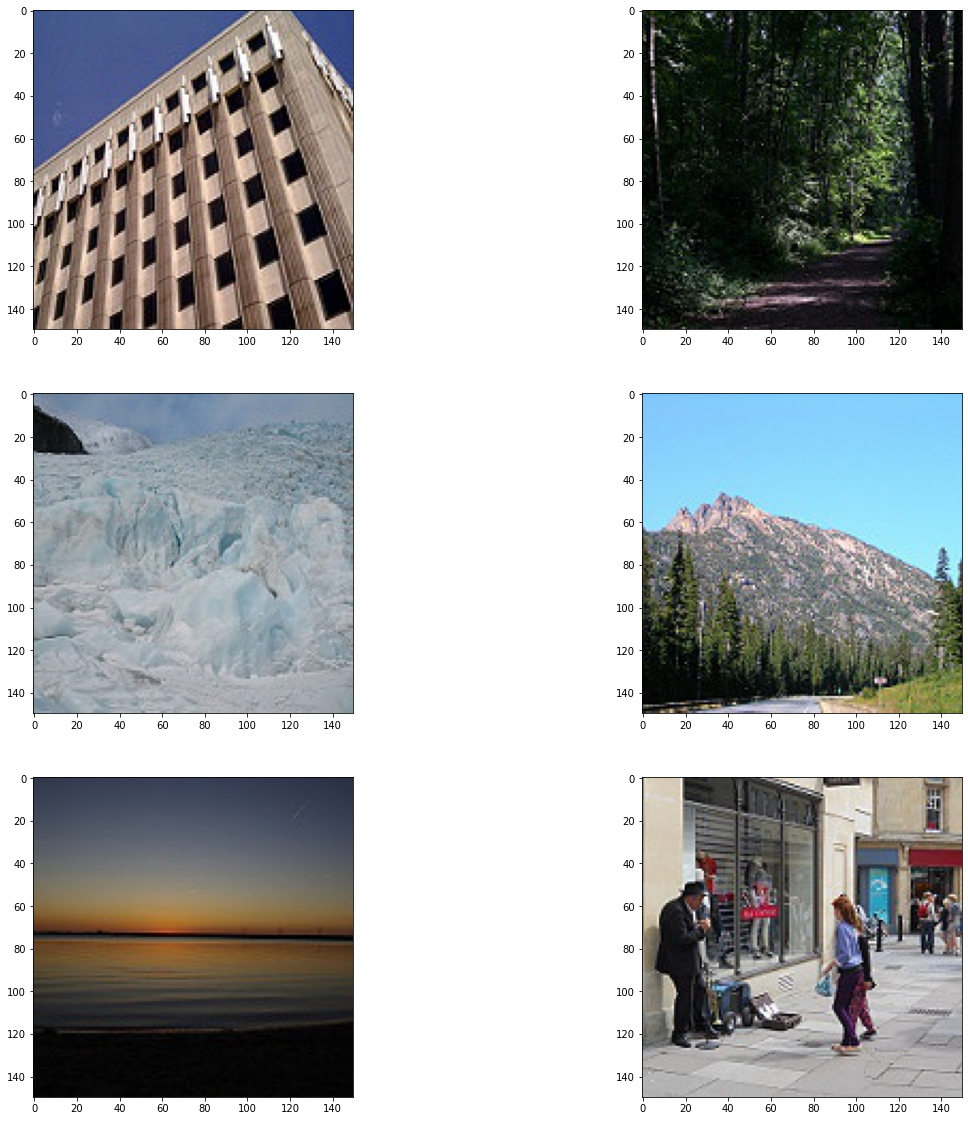

/content/drive/My Drive/Data for Learning/Intel_multiclass_image_dataset/seg_test/seg_test/


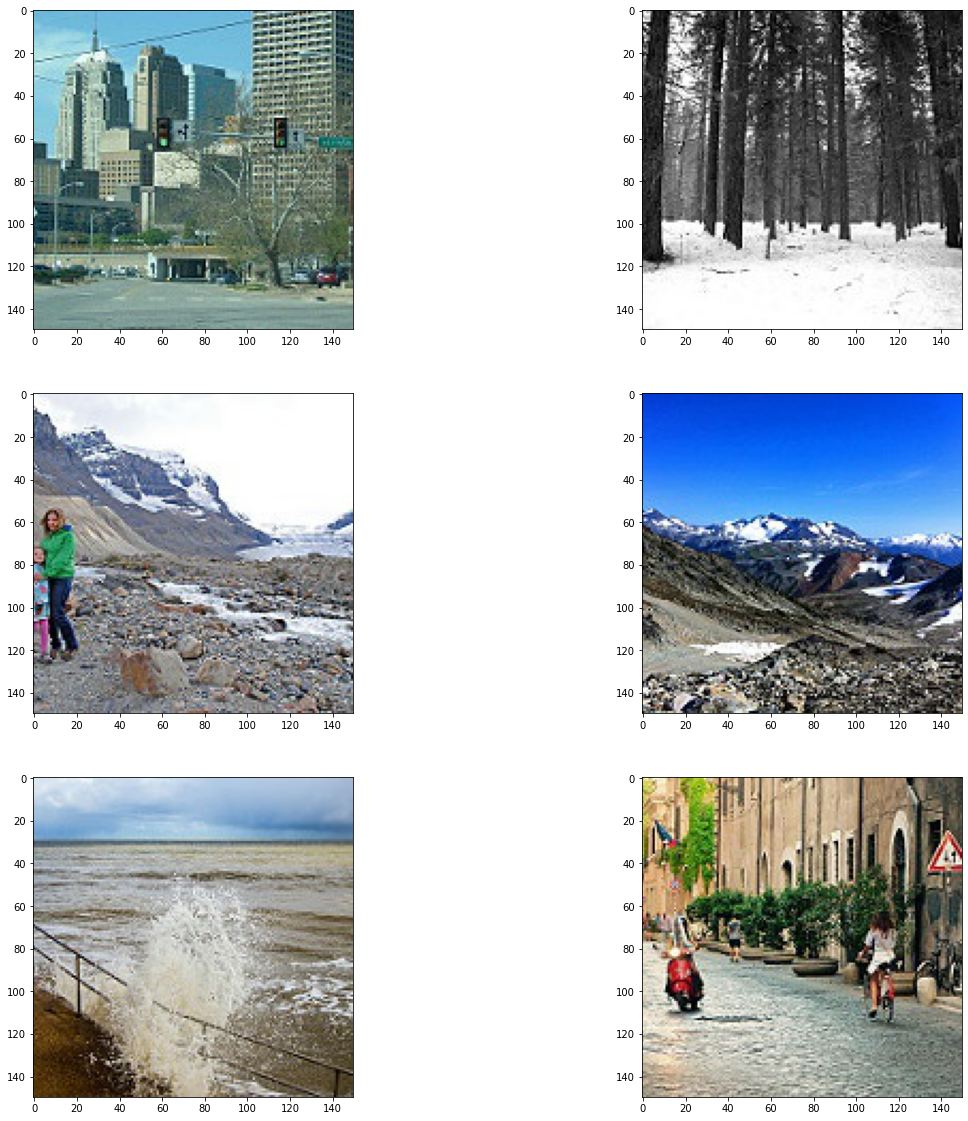

In [30]:
import os
import zipfile
# visualising out train, test and prediction datas 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)


base_path = '/content/drive/My Drive/Data for Learning/Intel_multiclass_image_dataset'
train_dir = os.path.join(base_path+'/seg_train/seg_train/')
test_dir = os.path.join(base_path+'/seg_test/seg_test/')
pred_dir = os.path.join(base_path+'/seg_pred/seg_pred/')
dirs = [train_dir,test_dir]

for path in dirs:
    print(path)
    building_dir = os.path.join(path + 'buildings' )
    forest_dir = os.path.join(path + 'forest' )
    glacier_dir = os.path.join(path + 'glacier' )
    mountain_dir = os.path.join(path + 'mountain' )
    sea_dir = os.path.join(path + 'sea' )
    street_dir = os.path.join(path + 'street' )

    building_files = os.listdir(building_dir)
    forest_files = os.listdir(forest_dir)
    glacier_files = os.listdir(glacier_dir)
    mountain_files = os.listdir(mountain_dir)
    sea_files = os.listdir(sea_dir)
    street_files = os.listdir(street_dir)
    
    for i in range(2):
        j=1
        sp = plt.subplot(3,2,j)
        #sp.axis('OFF')
        img = mpimg.imread(building_dir+'/'+building_files[i])
        plt.imshow(img)
        j=j+1

        sp = plt.subplot(3,2,j)
        j=j+1
        #sp.axis('OFF')
        img = mpimg.imread(forest_dir+'/'+forest_files[i])
        plt.imshow(img)

        sp = plt.subplot(3,2,j)
        j=j+1
        #sp.axis('OFF')
        img = mpimg.imread(glacier_dir+'/'+glacier_files[i])
        plt.imshow(img)

        sp = plt.subplot(3,2,j)
        j=j+1
        #sp.axis('OFF')
        img = mpimg.imread(mountain_dir+'/'+mountain_files[i])
        plt.imshow(img)

        sp = plt.subplot(3,2,j)
        j=j+1
        #sp.axis('OFF')
        img = mpimg.imread(sea_dir+'/'+sea_files[i])
        plt.imshow(img)

        sp = plt.subplot(3,2,j)
        j=j+1
        #sp.axis('OFF')
        img = mpimg.imread(street_dir+'/'+street_files[i])
        plt.imshow(img)
    plt.show()



In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

path_inception = '/content/drive/My Drive/Data for Learning/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                               include_top = False,
                               weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()




Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 74, 74, 32)   96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 74, 74, 32)   0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [26]:
#We will use only till mixed 7, because else size would be reduced too much
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [50]:
from keras.optimizers import Adam, RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation='relu')(x)
x = layers.Dropout(.2)(x)
#x = layers.Dense(512,activation='relu')(x)
#x = layers.Dropout(.2)(x)
x = layers.Dense(6,activation='softmax')(x)

opt = Adam(learning_rate = .001)
model = Model(pre_trained_model.input, x)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 74, 74, 32)   96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 74, 74, 32)   0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(train_dir,test_dir)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range =15,
    width_shift_range = .3,
    height_shift_range = .3,
    shear_range=.2,
    zoom_range=.3,
    horizontal_flip=False,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 10,
    target_size=(150,150),
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    test_dir,
    batch_size = 10,
    target_size = (150,150),
    class_mode= 'categorical'
)



/content/drive/My Drive/Data for Learning/Intel_multiclass_image_dataset/seg_train/seg_train/ /content/drive/My Drive/Data for Learning/Intel_multiclass_image_dataset/seg_test/seg_test/
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [40]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy') > .99):
            print("acc resched 99 percent")
            self.model.stop_training = True

callbacks = myCallback()

In [51]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 2,
    verbose=1,
    callbacks = [callbacks]
)

Epoch 1/2
1404/1404 [==============================] - 9508s 7s/step - loss: 0.6885 - accuracy: 0.7886 - val_loss: 0.3182 - val_accuracy: 0.8900
Epoch 2/2
1404/1404 [==============================] - 159s 114ms/step - loss: 0.4686 - accuracy: 0.8330 - val_loss: 0.2947 - val_accuracy: 0.8977


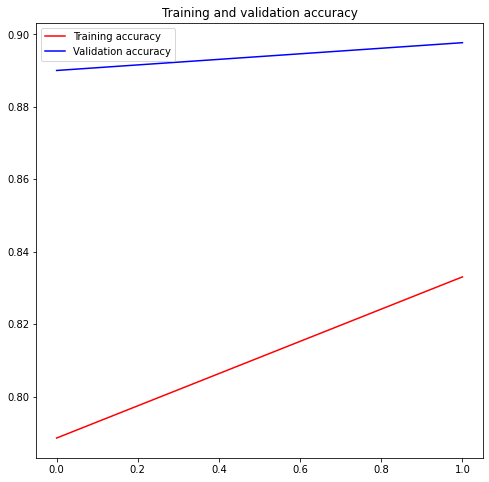

<Figure size 576x576 with 0 Axes>

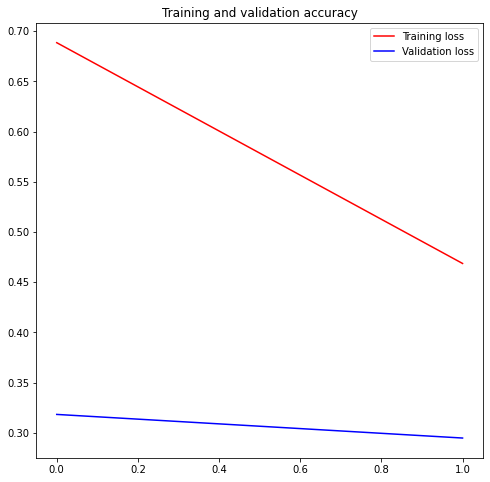

<Figure size 576x576 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,8)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [59]:
scenes = ['buildings','forest','glacier','mountain','sea','street']

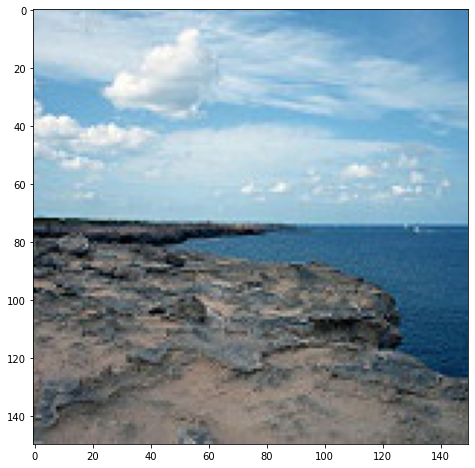

Predicted scene is :  sea    4


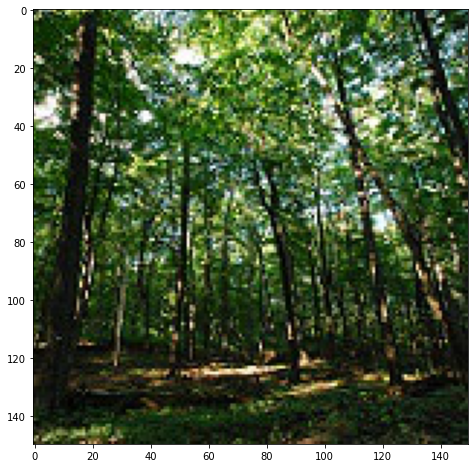

Predicted scene is :  forest    1


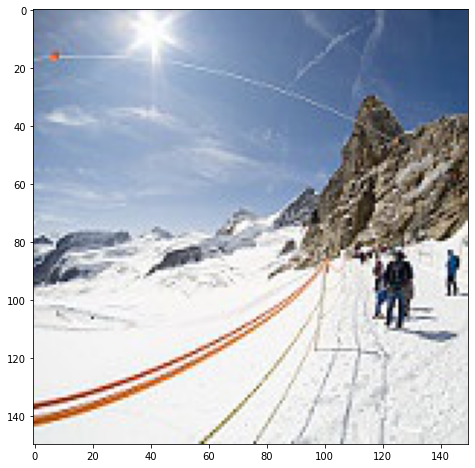

Predicted scene is :  glacier    2


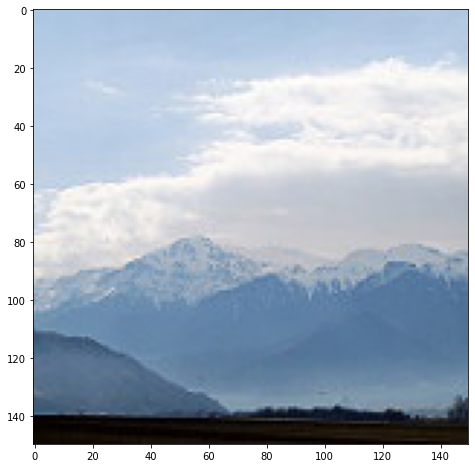

Predicted scene is :  mountain    3


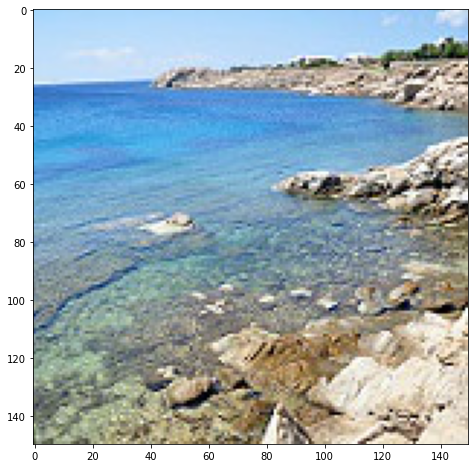

Predicted scene is :  sea    4


In [74]:
# YOU CAN KEEP THIS TAB RUNNING AND IT WILL DISPLAY RANDOM IMAGES FROM PRED FOLDER, AND PREDICT THEM. 
# RUN VARIOUS TIMES TO CHECK THE RESULS FROM THE MODEL

from keras.preprocessing import image
import random

files = os.listdir(pred_dir)
random.shuffle(files)


for file in files[0:5]:
    img=image.load_img(pred_dir+'/'+file,target_size=(150,150,3))
    img_array = image.img_to_array(img)
    plt.imshow(img)
    plt.show()

    x = np.expand_dims(img_array, axis=0)

    images = np.vstack([x])
    classes = model.predict(images/255., batch_size=10)

    print("Predicted scene is : ",scenes[np.argmax(classes)],"  ",np.argmax(classes))